### Ch13_1_1.py

In [1]:
from keras.preprocessing.text import text_to_word_sequence
# 定義文件
doc = "Keras is an API designed for human beings, not machines."
# 將文件分割成單字
words = text_to_word_sequence(doc)
print(words)

Using TensorFlow backend.


['keras', 'is', 'an', 'api', 'designed', 'for', 'human', 'beings', 'not', 'machines']


### Ch13_1_1a.py

In [2]:
from keras.preprocessing.text import text_to_word_sequence
# 定義文件
doc = "Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Outcome"
# 將文件分割成單字
words = text_to_word_sequence(doc, lower=False, split=",")
print(words)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Outcome']


### Ch13_1_1b.py

In [3]:
from keras.preprocessing.text import text_to_word_sequence
# 定義文件
doc = "This is a book. That is a pen."

words = set(text_to_word_sequence(doc))
vocab_size = len(words)
print(vocab_size)

6


### Ch13_1_2.py

In [5]:
from keras.preprocessing.text import Tokenizer
# 定義 3 份文件
docs = ["Keras is an API designed for human beings, not machines.",
        "Easy to learn and easy to use." ,
        "Keras makes it easy to turn models into products."]
# 建立 Tokenizer
tok = Tokenizer()
# 執行文字資料預處理
tok.fit_on_texts(docs)
# 顯示摘要資訊
print(tok.document_count)
print(tok.word_counts)
print(tok.word_index)
print(tok.word_docs)

3
OrderedDict([('keras', 2), ('is', 1), ('an', 1), ('api', 1), ('designed', 1), ('for', 1), ('human', 1), ('beings', 1), ('not', 1), ('machines', 1), ('easy', 3), ('to', 3), ('learn', 1), ('and', 1), ('use', 1), ('makes', 1), ('it', 1), ('turn', 1), ('models', 1), ('into', 1), ('products', 1)])
{'easy': 1, 'to': 2, 'keras': 3, 'is': 4, 'an': 5, 'api': 6, 'designed': 7, 'for': 8, 'human': 9, 'beings': 10, 'not': 11, 'machines': 12, 'learn': 13, 'and': 14, 'use': 15, 'makes': 16, 'it': 17, 'turn': 18, 'models': 19, 'into': 20, 'products': 21}
defaultdict(<class 'int'>, {'not': 1, 'for': 1, 'designed': 1, 'beings': 1, 'human': 1, 'keras': 2, 'api': 1, 'an': 1, 'machines': 1, 'is': 1, 'and': 1, 'easy': 2, 'use': 1, 'learn': 1, 'to': 2, 'makes': 1, 'turn': 1, 'into': 1, 'models': 1, 'products': 1, 'it': 1})


### Ch13_1_2a.py

In [6]:
from keras.preprocessing.text import Tokenizer
# 定義 3 份文件
docs = ["Keras is an API designed for human beings, not machines.",
        "Easy to learn and easy to use." ,
        "Keras makes it easy to turn models into products."]
# 建立 Tokenizer
tok = Tokenizer()
# 執行文字資料預處理
tok.fit_on_texts(docs)
# 建立序列資料
words = tok.texts_to_sequences(docs)
print(words)

[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [1, 2, 13, 14, 1, 2, 15], [3, 16, 17, 1, 2, 18, 19, 20, 21]]


### Ch13_2.py

In [15]:
import re, os
from os import listdir
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

# IMDb資料所在目錄
cwd = os.getcwd()
path = f"{cwd}/aclImdb/"
print('path:', path)
# 建立檔案清單
fList = [path + "train/pos/" + x for x in listdir(path + "train/pos")] + \
        [path + "train/neg/" + x for x in listdir(path + "train/neg")] + \
        [path + "test/pos/" + x for x in listdir(path + "test/pos")] + \
        [path + "test/neg/" + x for x in listdir(path + "test/neg")]

# 刪除HTML標籤的符號
def remove_tags(text):
    TAG = re.compile(r'<[^>]+>')
    return TAG.sub('', text)
# 讀取文字檔案的資料    
input_label = ([1] * 12500 + [0] * 12500) * 2
input_text  = []
# 讀取檔案內容
for fname in fList:
    with open(fname, encoding="utf8") as ff:
        input_text += [remove_tags(" ".join(ff.readlines()))]
print(input_text[5])
print(input_label[5])
# 將文件分割成單字, 建立詞索引字典       
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(input_text[:25000])
print("文件數: ", tok.document_count)
print({k: tok.word_index[k] for k in list(tok.word_index)[:10]})
# 建立訓練和測試資料集
X_train = tok.texts_to_sequences(input_text[:25000])
X_test  = tok.texts_to_sequences(input_text[25000:])
Y_train = input_label[:25000]
Y_test  = input_label[25000:]
# 將序列資料填充成相同長度
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test  = sequence.pad_sequences(X_test,  maxlen=100)
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)

path: /Users/paulin/Desktop/Tensorflow與Keras/Ch13/aclImdb/
I saw the movie with two grown children. Although it was not as clever as Shrek, I thought it was rather good. In a movie theatre surrounded by children who were on spring break, there was not a sound so I know the children all liked it. There parents also seemed engaged. The death and apparent death of characters brought about the appropriate gasps and comments. Hopefully people realize this movie was made for kids. As such, it was successful although I liked it too. Personally I liked the Scrat!!
1
文件數:  25000
{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'in': 7, 'it': 8, 'i': 9, 'this': 10}
X_train.shape:  (25000, 100)
X_test.shape:  (25000, 100)


### Ch13_2a.py
* MLP

In [17]:
import re
from os import listdir
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Flatten

# IMDb資料所在目錄
cwd = os.getcwd()
path = f"{cwd}/aclImdb/"
print('path:', path)
# 建立檔案清單
fList = [path + "train/pos/" + x for x in listdir(path + "train/pos")] + \
        [path + "train/neg/" + x for x in listdir(path + "train/neg")] + \
        [path + "test/pos/" + x for x in listdir(path + "test/pos")] + \
        [path + "test/neg/" + x for x in listdir(path + "test/neg")]

# 刪除HTML標籤的符號
def remove_tags(text):
    TAG = re.compile(r'<[^>]+>')
    return TAG.sub('', text)
# 讀取文字檔案的資料    
input_label = ([1] * 12500 + [0] * 12500) * 2
input_text  = []
# 讀取檔案內容
for fname in fList:
    with open(fname, encoding="utf8") as ff:
        input_text += [remove_tags(" ".join(ff.readlines()))]
# 將文件分割成單字        
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(input_text[:25000])
print("文件數: ", tok.document_count)
# 建立訓練和測試資料集
X_train = tok.texts_to_sequences(input_text[:25000])
X_test  = tok.texts_to_sequences(input_text[25000:])
Y_train = input_label[:25000]
Y_test  = input_label[25000:]
# 將序列資料填充成相同長度
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test  = sequence.pad_sequences(X_test,  maxlen=100)
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
# 定義模型
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=32, input_length=100)) # input_dim: Size of the vocabulary
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=5, batch_size=128, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

path: /Users/paulin/Desktop/Tensorflow與Keras/Ch13/aclImdb/
文件數:  25000
X_train.shape:  (25000, 100)
X_test.shape:  (25000, 100)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           64000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               819456    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


25000/25000 [==============================] - 1s 24us/step
測試資料集的準確度 = 0.82


### Ch13_3_1.py

In [18]:
from keras.preprocessing.image import load_img
# 載入圖檔
img = load_img("penguins.png")
# 顯示圖片資訊
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# 顯示圖片
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(img)

<class 'PIL.PngImagePlugin.PngImageFile'>
PNG
RGB
(505, 763)


### Ch13_3_2.py

<class 'PIL.PngImagePlugin.PngImageFile'>
float32
(763, 505, 3)
<class 'PIL.Image.Image'>


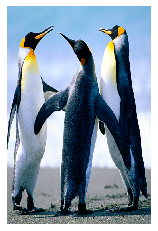

In [20]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
%matplotlib inline

# 載入圖檔
img = load_img("penguins.png")
# 顯示圖片資訊
print(type(img))
# 轉換成 Numpy 陣列
img_array = img_to_array(img)
print(img_array.dtype)
print(img_array.shape)
# 將 Numpy 陣列轉換成 Image
img2 = array_to_img(img_array)
print(type(img2))
# 顯示圖片
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(img2)

### Ch13_3_2a.py

<class 'PIL.Image.Image'>
float32
(227, 227, 1)
<class 'PIL.Image.Image'>


/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


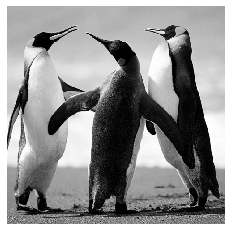

In [21]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
# 載入圖檔
img = load_img("penguins.png", grayscale=True,
               target_size=(227, 227))
# 顯示圖片資訊
print(type(img))
# 轉換成 Numpy 陣列
img_array = img_to_array(img)
print(img_array.dtype)
print(img_array.shape)
# 將 Numpy 陣列轉換成 Image
img2 = array_to_img(img_array)
print(type(img2))
# 顯示圖片
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(img2, cmap="gray")

### Ch13_3_3.py

<class 'PIL.Image.Image'>


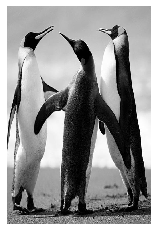

In [22]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import save_img
# 載入圖檔
img = load_img("penguins.png", grayscale=True)
# 顯示圖片資訊
print(type(img))
# 轉換成 Numpy 陣列
img_array = img_to_array(img)
# 儲存圖檔
save_img("penguins_grayscale.jpg", img_array)
# 載入圖片
img2 = load_img("penguins_grayscale.jpg")
# 顯示圖片
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(img2, cmap="gray")

### Ch13_4_1.py

(1, 707, 505, 3)


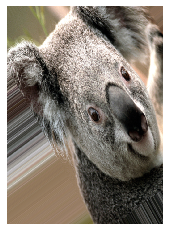

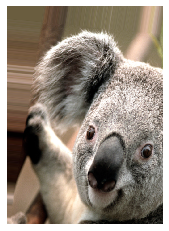

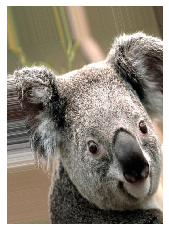

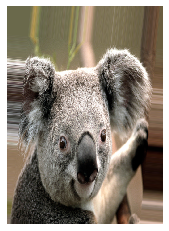

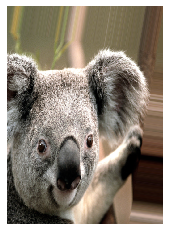

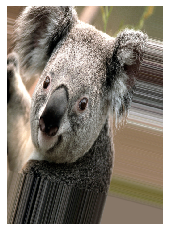

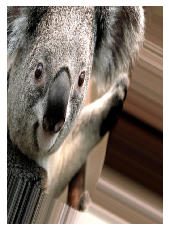

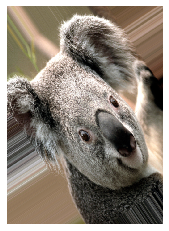

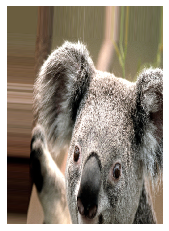

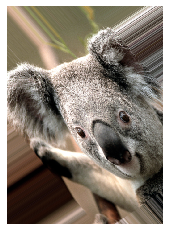

In [23]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

img = load_img("koala.png") 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  # reshape (1, 707, 505, 3)
print(x.shape)

datagen = ImageDataGenerator(
           rotation_range=40,
           width_shift_range=0.2,
           height_shift_range=0.2,
           shear_range=0.2,
           zoom_range=0.2,
           horizontal_flip=True)
i = 0
for batch_img in datagen.flow(x, batch_size=1,
                              save_to_dir="preview", 
                              save_prefix="pen",
                              save_format="jpeg"):
    plt.axis("off")
    plt.imshow(batch_img[0].astype("int"))
    plt.show()
    i += 1
    if i >= 10:
        break 

### Ch13_4_2.py

(1, 707, 505, 3)


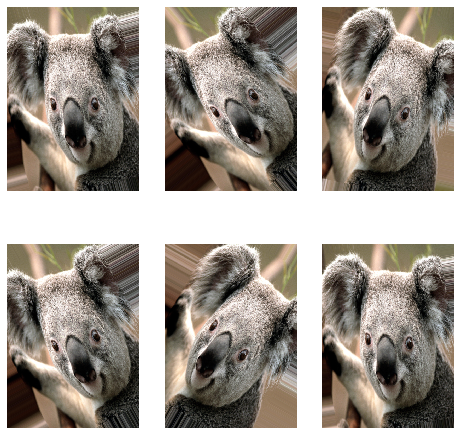

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

img = load_img("koala.png") 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  # reshape (1, hight, width, 3)
print(x.shape)

datagen = ImageDataGenerator(rotation_range=40)

numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

### Ch13_4_2a.py

(1, 707, 505, 3)


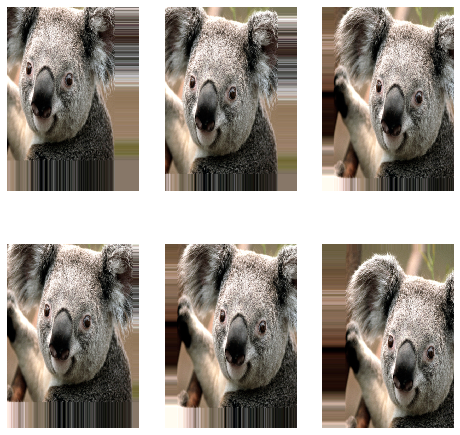

In [27]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

img = load_img("koala.png") 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  # reshape (1, hight, width, 3)
print(x.shape)

datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2)
numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

### Ch13_4_2b.py

(1, 707, 505, 3)


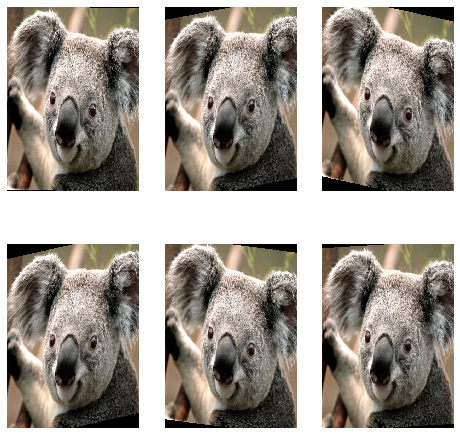

In [29]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

img = load_img("koala.png") 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  # reshape (1, 763, 505, 3)
print(x.shape)

datagen = ImageDataGenerator(shear_range=15,
                             fill_mode="constant")

numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

### Ch13_4_2c.py

(1, 707, 505, 3)


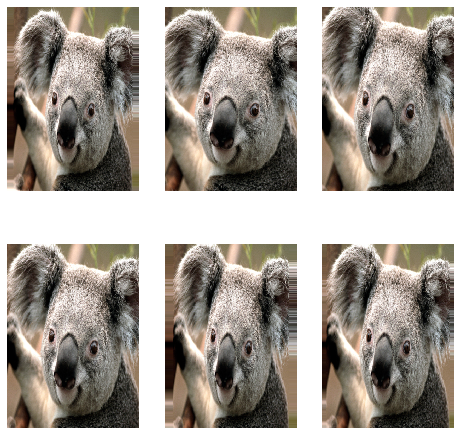

In [30]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

img = load_img("koala.png") 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  # reshape (1, hight, width, 3)
print(x.shape)

datagen = ImageDataGenerator(zoom_range=0.2)

numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

### Ch13_4_2d.py

(1, 707, 505, 3)


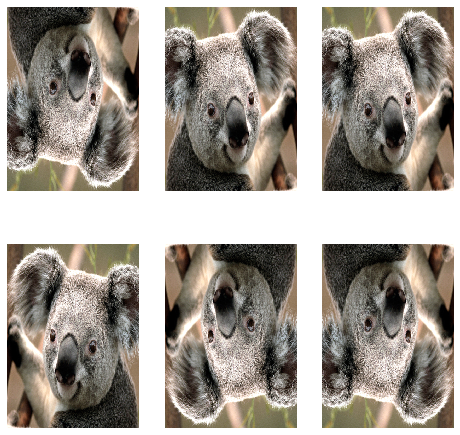

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

img = load_img("koala.png") 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  # reshape (1, hight, width, 3)
print(x.shape)

datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True)

numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

### Ch13_5_1.py

In [33]:
import numpy as np
from keras.datasets import cifar10

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 打亂 2 個 Numpy 陣列
def randomize(a, b):
    permutation = list(np.random.permutation(a.shape[0]))
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    
    return shuffled_a, shuffled_b

X_train, Y_train = randomize(X_train, Y_train)
# 取出前 20% 的訓練資料
X_train_part = X_train[:10000]
Y_train_part = Y_train[:10000]
print(X_train_part.shape, Y_train_part.shape)
# 顯示每一種類別有幾筆資料
unique, counts = np.unique(Y_train_part, return_counts=True)
print(dict(zip(unique, counts)))

(10000, 32, 32, 3) (10000, 1)
{0: 1024, 1: 1008, 2: 999, 3: 1023, 4: 1004, 5: 978, 6: 993, 7: 999, 8: 986, 9: 986}


### Ch13_5_2.py

(10000, 32, 32, 3) (10000, 10)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)        

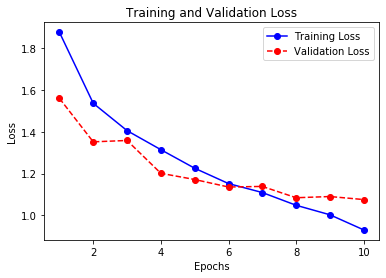

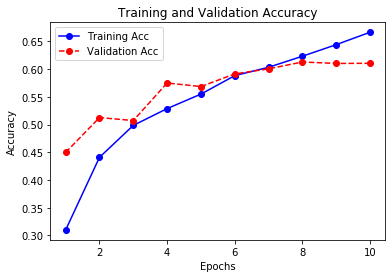

In [34]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 打亂 2 個 Numpy 陣列
def randomize(a, b):
    permutation = list(np.random.permutation(a.shape[0]))
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    
    return shuffled_a, shuffled_b

X_train, Y_train = randomize(X_train, Y_train)
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 取出20%訓練, 10%驗證
X_train_part = X_train[:10000]
Y_train_part = Y_train[:10000]
print(X_train_part.shape, Y_train_part.shape)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train_part, Y_train_part, 
                    validation_data=(X_test, Y_test), 
                    epochs=10, batch_size=32, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch13_5_3.py
* ImageDataGenerator

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 打亂 2 個 Numpy 陣列
def randomize(a, b):
    permutation = list(np.random.permutation(a.shape[0]))
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    
    return shuffled_a, shuffled_b

X_train, Y_train = randomize(X_train, Y_train)
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 取出20%訓練, 10%驗證
X_train_part = X_train[:10000]
Y_train_part = Y_train[:10000]
print(X_train_part.shape, Y_train_part.shape)
# 資料預處理
train_datagen = ImageDataGenerator(
           rescale=1. / 255,
           width_shift_range=0.1,
           height_shift_range=0.1,
           shear_range=0.1,
           zoom_range=0.1,
           horizontal_flip=True)

train_generator = train_datagen.flow(
             X_train_part, Y_train_part,
             batch_size=16)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit_generator(
          train_generator,
          steps_per_epoch=10000,
          epochs=14, verbose=0,
          validation_data=(X_test, Y_test))
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

(10000, 32, 32, 3) (10000, 10)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_7 (Dense)        